In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt 

(300, 450)


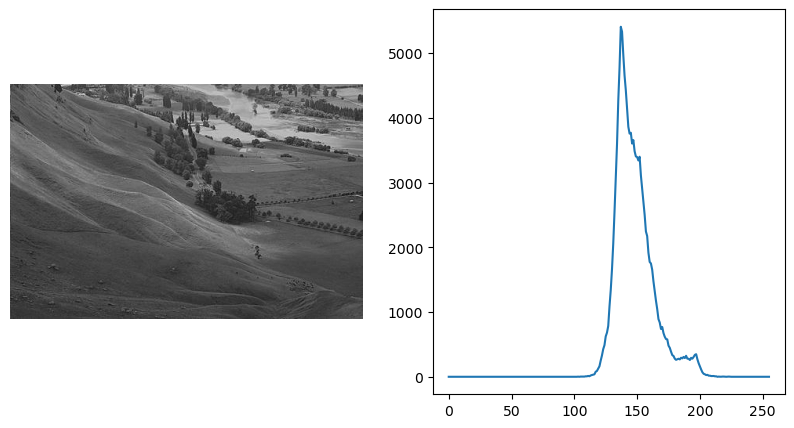

In [2]:
# read image file lq.jpg low quality image
img =  cv2.imread('lq.jpg')

img = img[:,:,0]
print(img.shape)

[m,n] = img.shape

#calculate histogram
h = cv2.calcHist([img],[0],None,[256],[0,256])
h = np.hstack(h)

# plot image and its histogram
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(h)

plt.show()

In [3]:
## Histogram Equalization
pr = h/(m*n)
L = 256

sk = np.zeros((256),dtype=np.uint8)

for k in range(256):
    sk[k] = np.round(255*np.sum(pr[:k]),1)

img2 = sk[img]


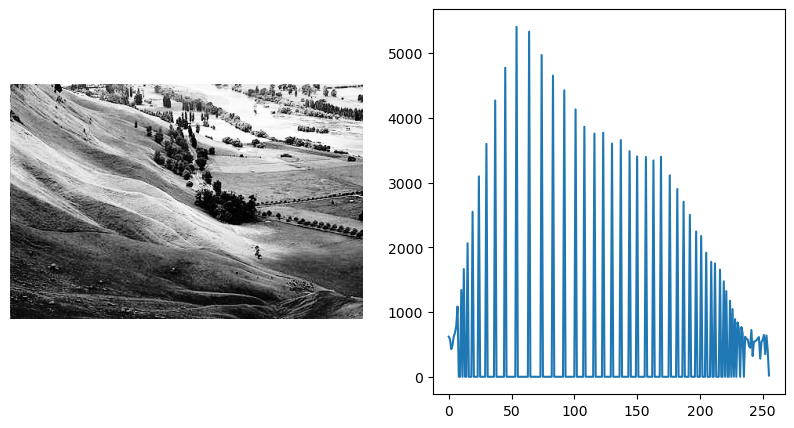

In [4]:
[m,n] = img2.shape

#calculate histogram
h = cv2.calcHist([img2],[0],None,[256],[0,256])

h = np.hstack(h)

# plot image and its histogram
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img2, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(h)

plt.show()

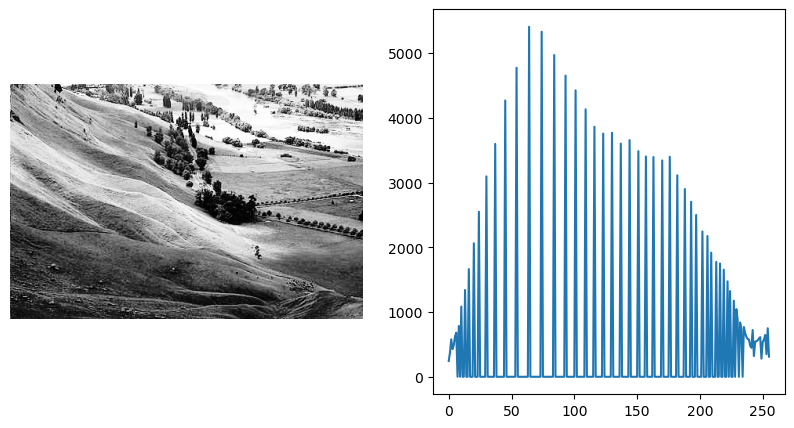

In [5]:
# Using inbuilt function in opencv for Histogram Equalization
img2 = cv2.equalizeHist(img)

#calculate histogram
h = cv2.calcHist([img2],[0],None,[256],[0,256])

h = np.hstack(h)

# plot image and its histogram
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img2, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(h)

plt.show()

(-0.5, 899.5, 299.5, -0.5)

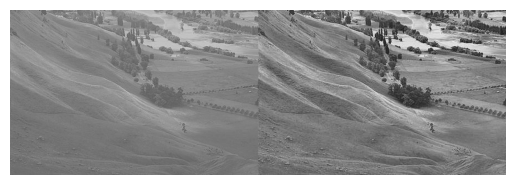

In [6]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

im = np.hstack((img,img2))
plt.imshow(im, cmap = 'gray')
plt.axis('off')